In [ ]:
#The code for this project was partly inspired from the 
#Silik project : https://github.com/mrauer/siklik/

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
data = pd.read_csv('datasets/index_ohlcv_10yrs.csv')    

In [192]:
data.head()

Date      Open      High       Low     Close  Adj Close  Volume  \
0  2010-01-04  17473.45  17582.84  17378.38  17558.73   17558.73   28200   
1  2010-01-05  17555.77  17729.78  17555.77  17686.24   17686.24   27000   
2  2010-01-06  17719.47  17790.33  17636.71  17701.13   17701.13   21400   
3  2010-01-07  17701.97  17733.34  17566.54  17615.72   17615.72   18000   
4  2010-01-08  17603.87  17658.12  17508.96  17540.29   17540.29   17200   

  index-name  
0     ^BSESN  
1     ^BSESN  
2     ^BSESN  
3     ^BSESN  
4     ^BSESN

In [193]:
class hops:
    def __init__(self, index_name, data, size=100):
        self.index_name = index_name
        self.size = size
        self.data = data
        self.values = {}
        self.averages = {}
        
    def filter_data(self):
        data = self.data[self.data['index-name'] == self.index_name].reset_index(drop=True)
        data['Year'] = pd.to_datetime(data['Date']).dt.year.astype(str)
        for yr in range(2010,2021):
            temp = data[data['Year'] == str(yr)].reset_index(drop=True)
            index, closes = list(temp.index), temp['Adj Close'].tolist()
            self.values[yr] = list(zip(index, closes))
            
    def calc_business_days(self):
        data = self.data[self.data['index-name'] == self.index_name].reset_index(drop=True)
        data['Year'] = pd.to_datetime(data['Date']).dt.year
        self.bdays = {yr:data[data['Year'] == yr].shape[0] for yr in range(2010,2021)}
        
    def get_business_days(self):
        return self.bdays
        
    def find_averages(self):
        for key, value in self.values.items():
            l = [ val[1] for val in value ]
            values = {}
            for i in range(1,len(l)):
                val = []
                for j in range(0,len(l), i):
                    try:
                        diff = ((l[i+j] - l[i])/l[i])*100
                        val.append(diff)
                    except:
                        break
                values[i] = [j, val, np.mean(val), np.std(val)]
    
            self.averages[key] = [ [k, v[2], v[3]] for k,v in values.items() if v[2] ]
        

    def plot_values(self):
        fig, axes = plt.subplots(11,3, figsize=(15,60))
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        flag = 0
        for key, value in self.averages.items():
            v1 = [ val[0] for val in value ]
            v2 = [ val[1] for val in value ]
            v3 = [ val[2] for val in value ]
            df = pd.DataFrame({'v1':v1, 'v2':v2, 'v3':v3})
            name = self.index_name.replace('^','')
            df.plot(x='v1', y='v2', grid=True, kind='line', rot=30, legend=False, title=name + ': Average hop returns,' + ' ' + str(key), ax=axes[flag][0]).set(xlabel='Hop Value', ylabel='Average returns')
            df.plot(x='v1', y='v3', grid=True, kind='line', rot=30, legend=False, title=name + ': Std. Dev. hop returns,' + ' ' + str(key), ax=axes[flag][1]).set(xlabel='Hop Value', ylabel='Std. Dev. returns')
            df['v2'].plot(kind='hist', ax=axes[flag][2], grid=True, title=name + ': Distribution of hop returns, ' + str(key)).set(xlabel='Average Returns')
            flag += 1
        plt.savefig(name + '_plot.pdf')
        plt.show()

In [194]:
def index_cycles(index_name, data, size=100):
    ind_obj = hops(index_name, data, size)
    ind_obj.filter_data()
    ind_obj.find_averages()
    ind_obj.plot_values()

In [195]:
indices = list(set(data['index-name'].tolist()))

In [196]:
for ind in indices:
    df = hops(ind, data, 100)
    df.calc_business_days()
    bdays = df.get_business_days()
    print("Index : {}".format(ind))
    for k, v in bdays.items():
        print("Year : {}, No. of business days : {}".format(k, v))

Index : ^GDAXI
Year : 2010, No. of business days : 256
Year : 2011, No. of business days : 256
Year : 2012, No. of business days : 253
Year : 2013, No. of business days : 252
Year : 2014, No. of business days : 252
Year : 2015, No. of business days : 253
Year : 2016, No. of business days : 255
Year : 2017, No. of business days : 252
Year : 2018, No. of business days : 251
Year : 2019, No. of business days : 251
Year : 2020, No. of business days : 63
Index : ^IXIC
Year : 2010, No. of business days : 252
Year : 2011, No. of business days : 252
Year : 2012, No. of business days : 250
Year : 2013, No. of business days : 252
Year : 2014, No. of business days : 252
Year : 2015, No. of business days : 252
Year : 2016, No. of business days : 252
Year : 2017, No. of business days : 251
Year : 2018, No. of business days : 251
Year : 2019, No. of business days : 252
Year : 2020, No. of business days : 61
Index : ^FTSE
Year : 2010, No. of business days : 253
Year : 2011, No. of business days : 251

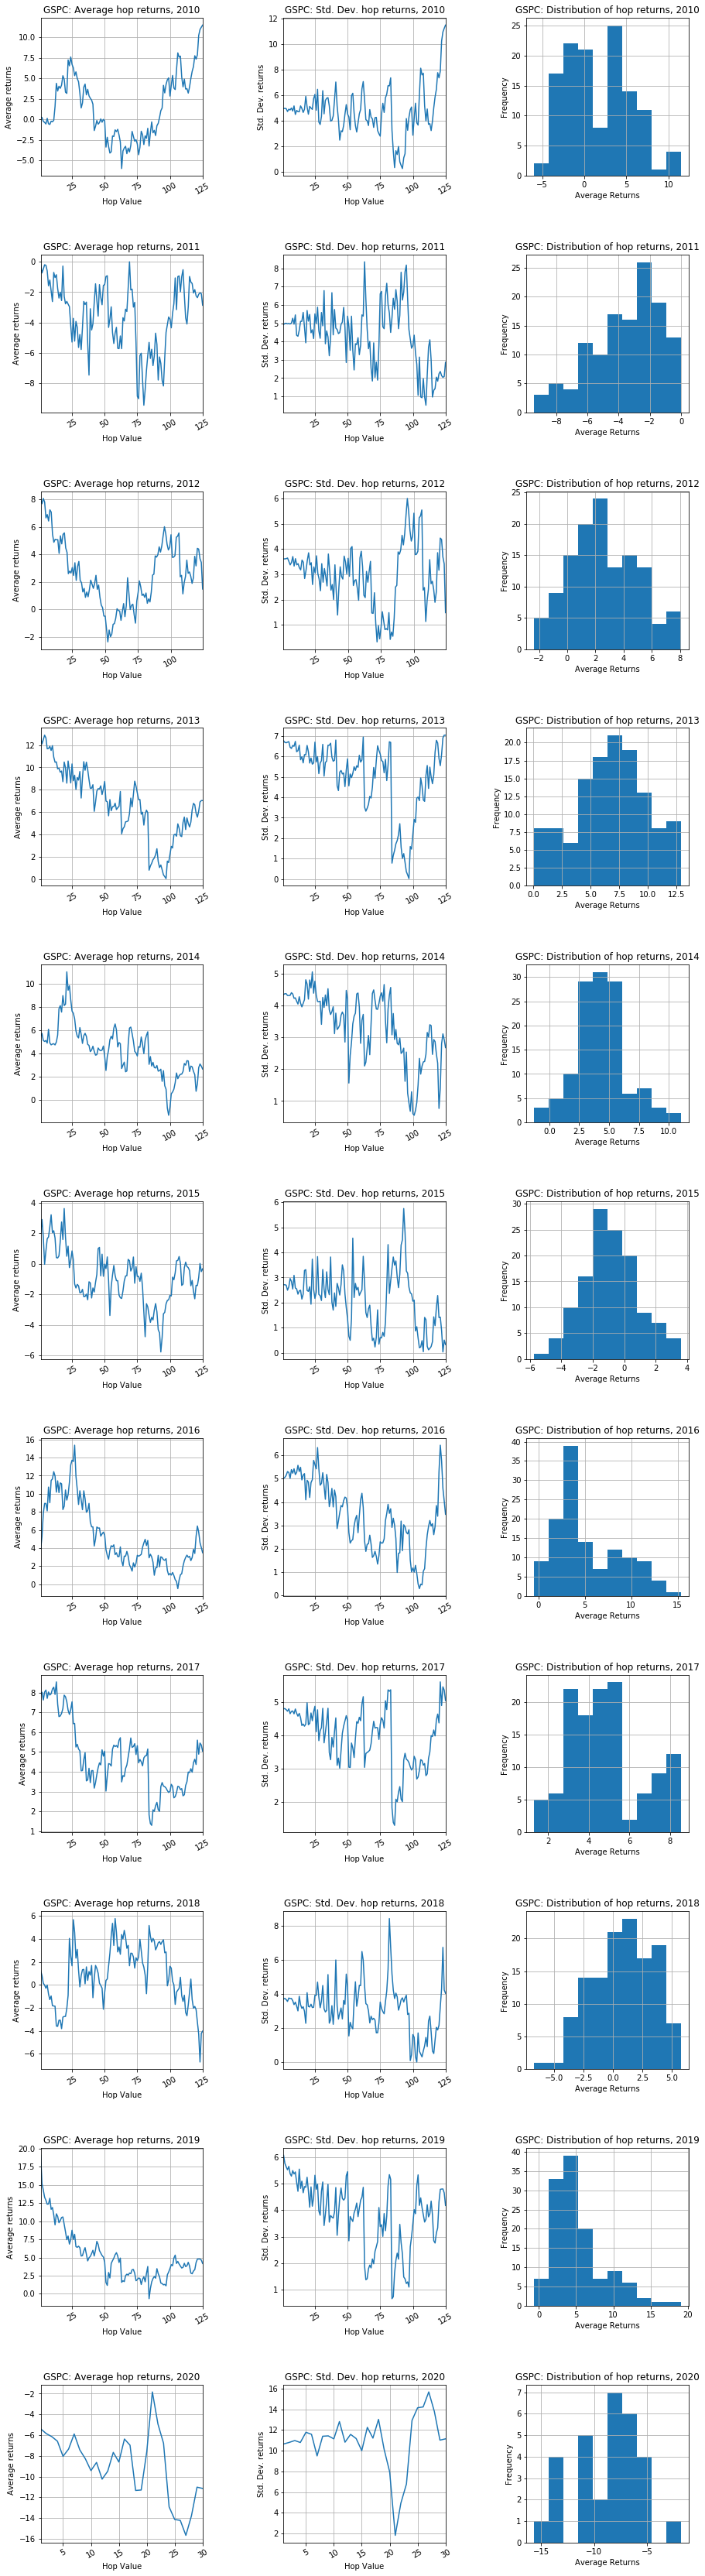

In [197]:
index_cycles('^GSPC', data)

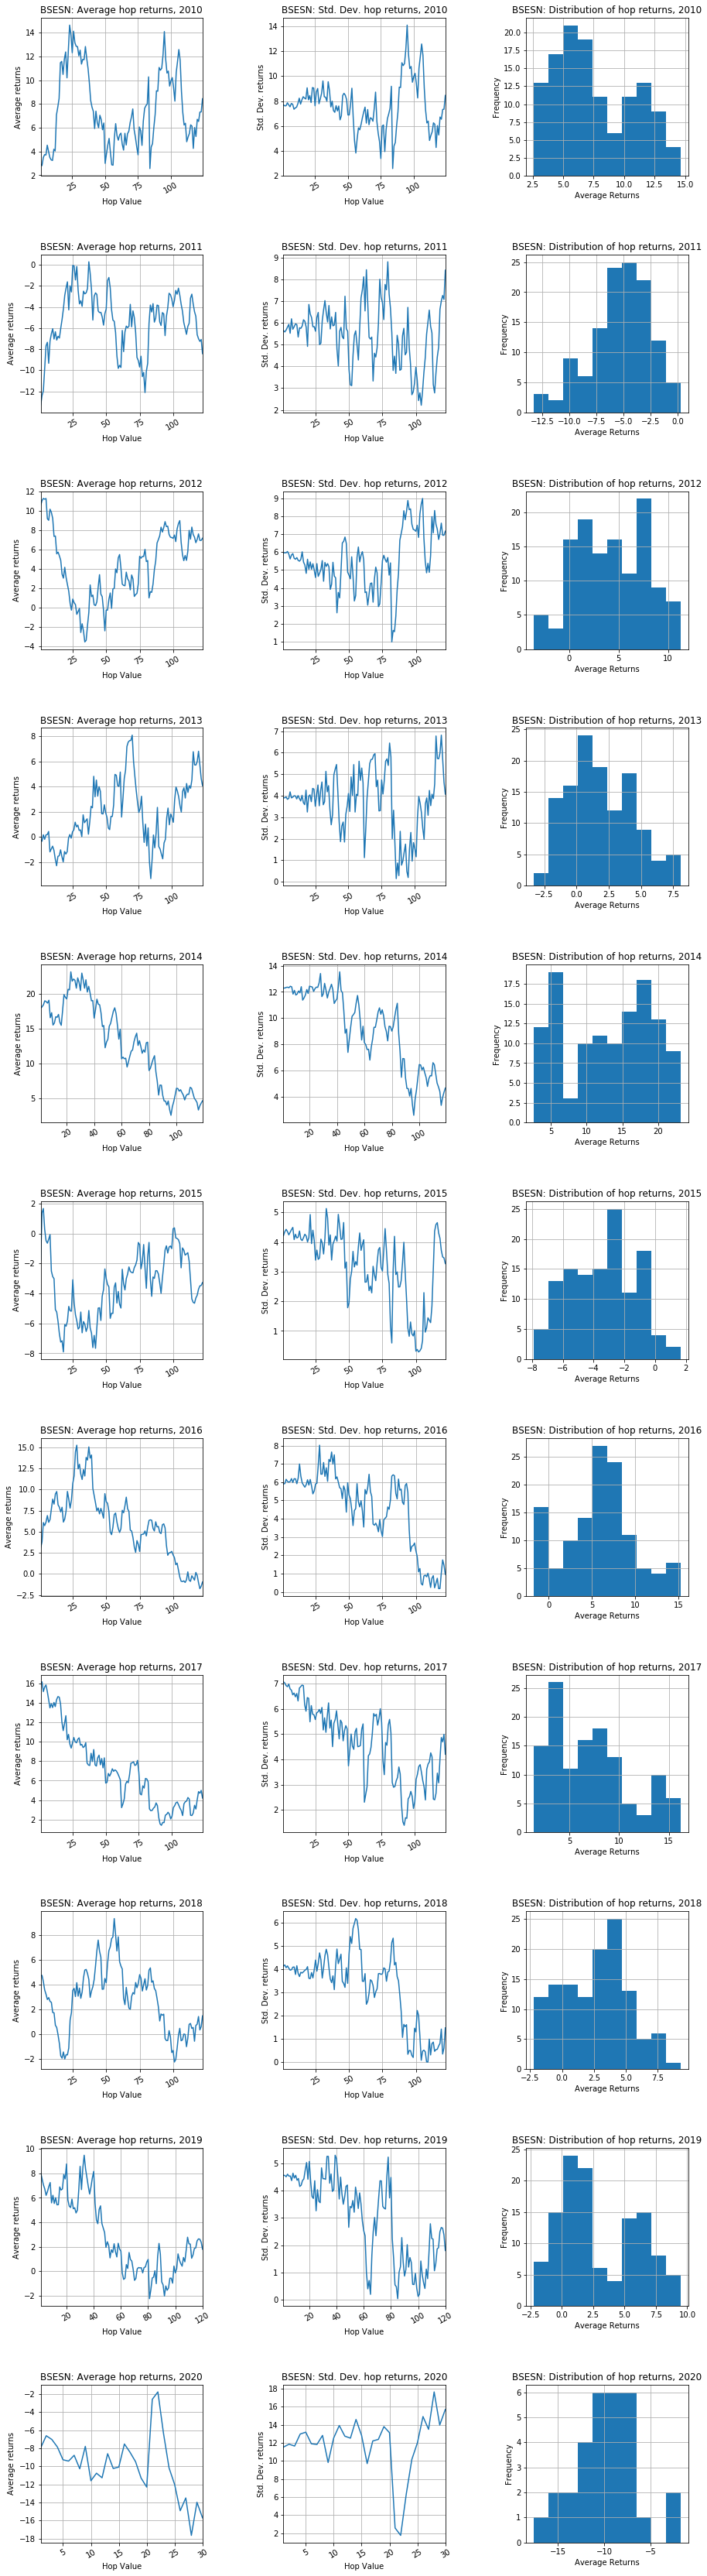

In [198]:
index_cycles('^BSESN', data)

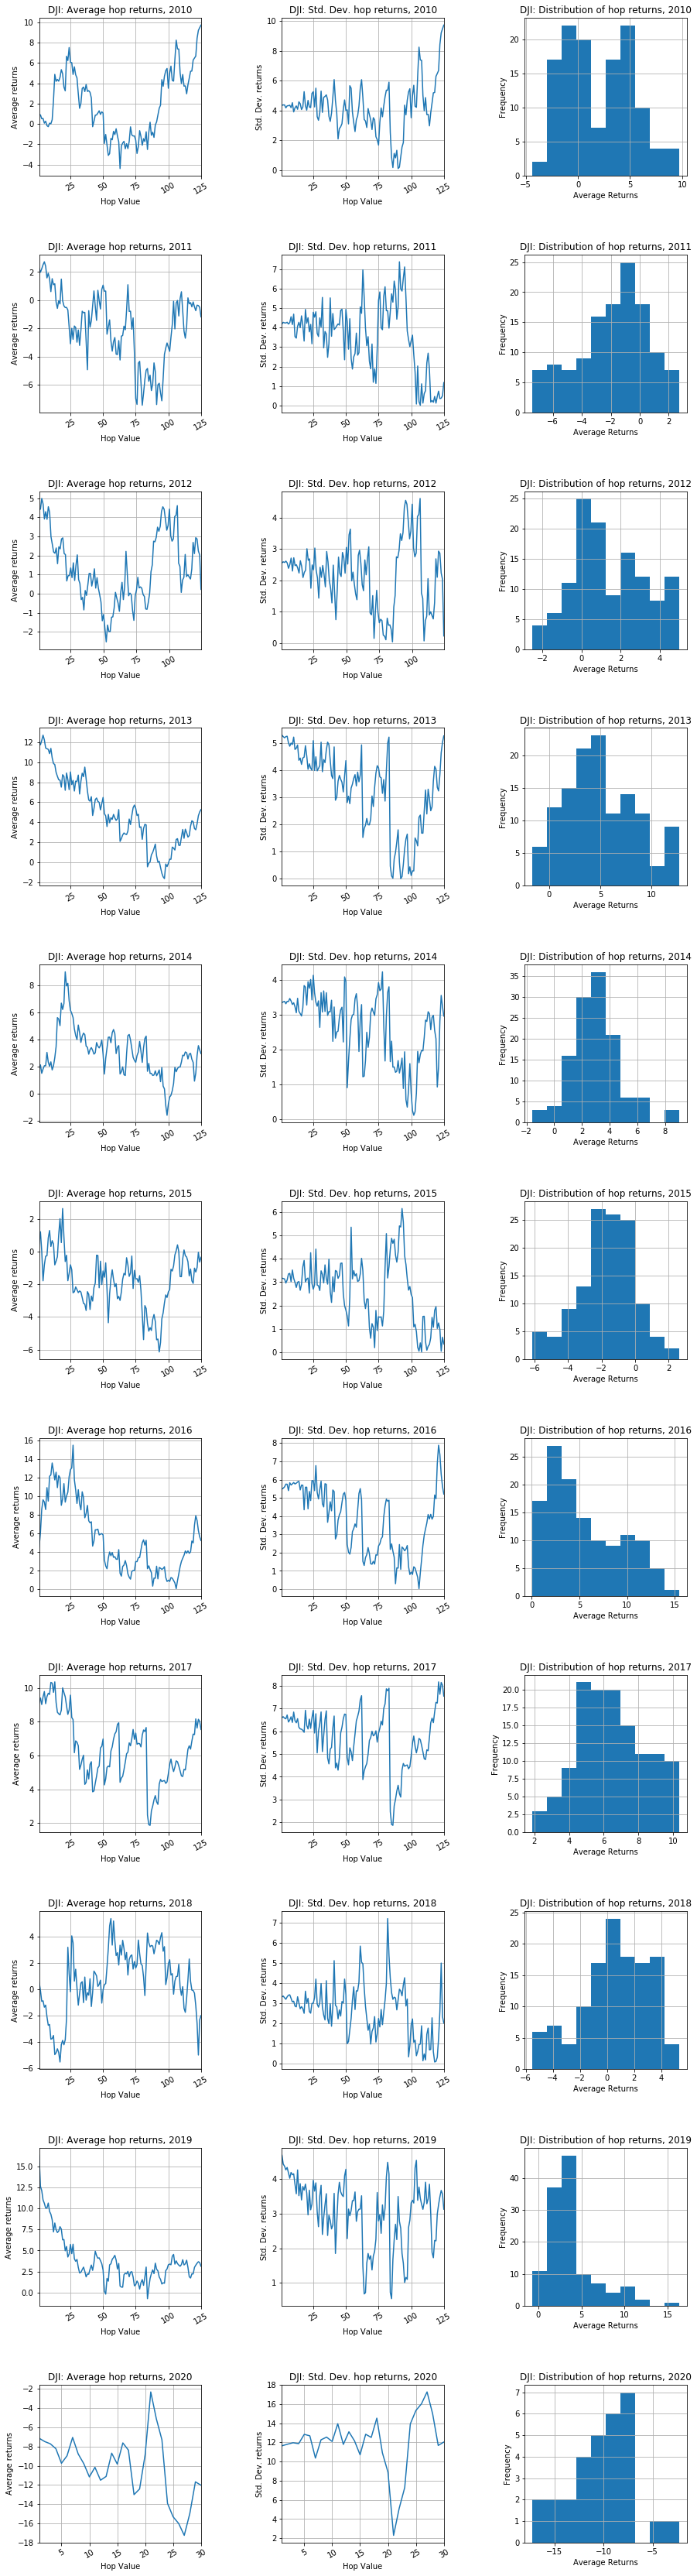

In [199]:
index_cycles('^DJI', data)

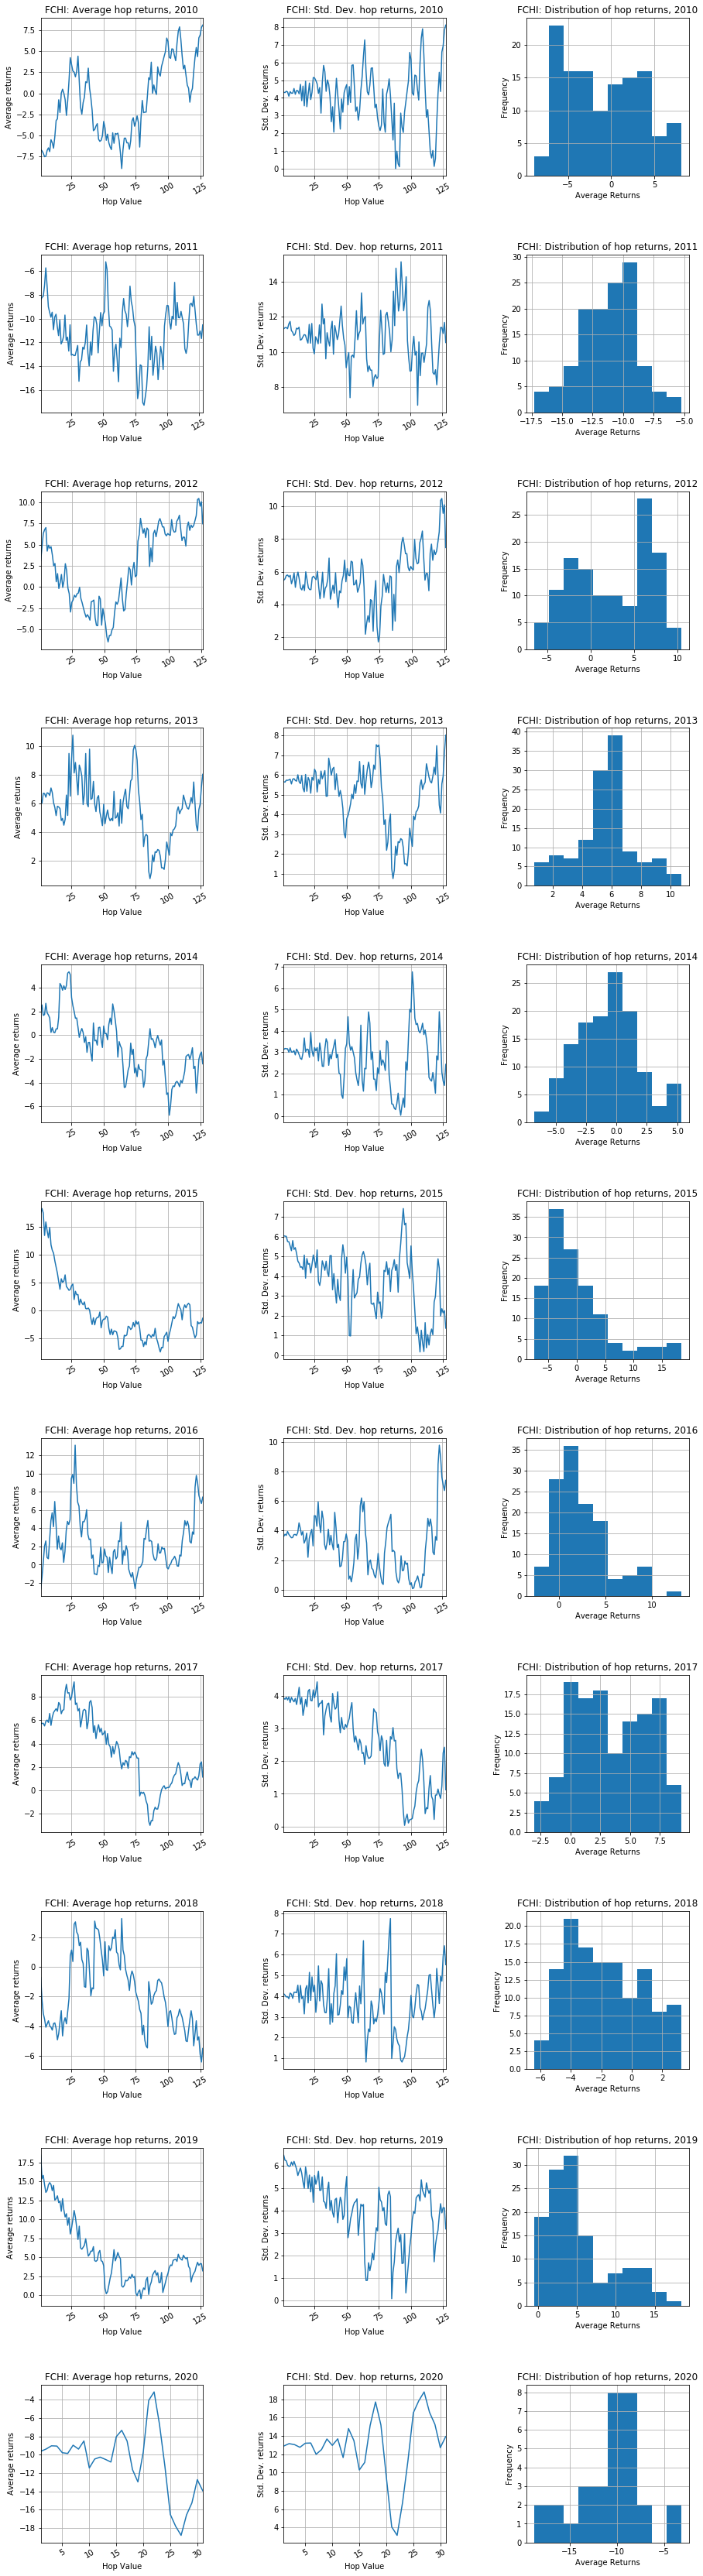

In [200]:
index_cycles('^FCHI', data)

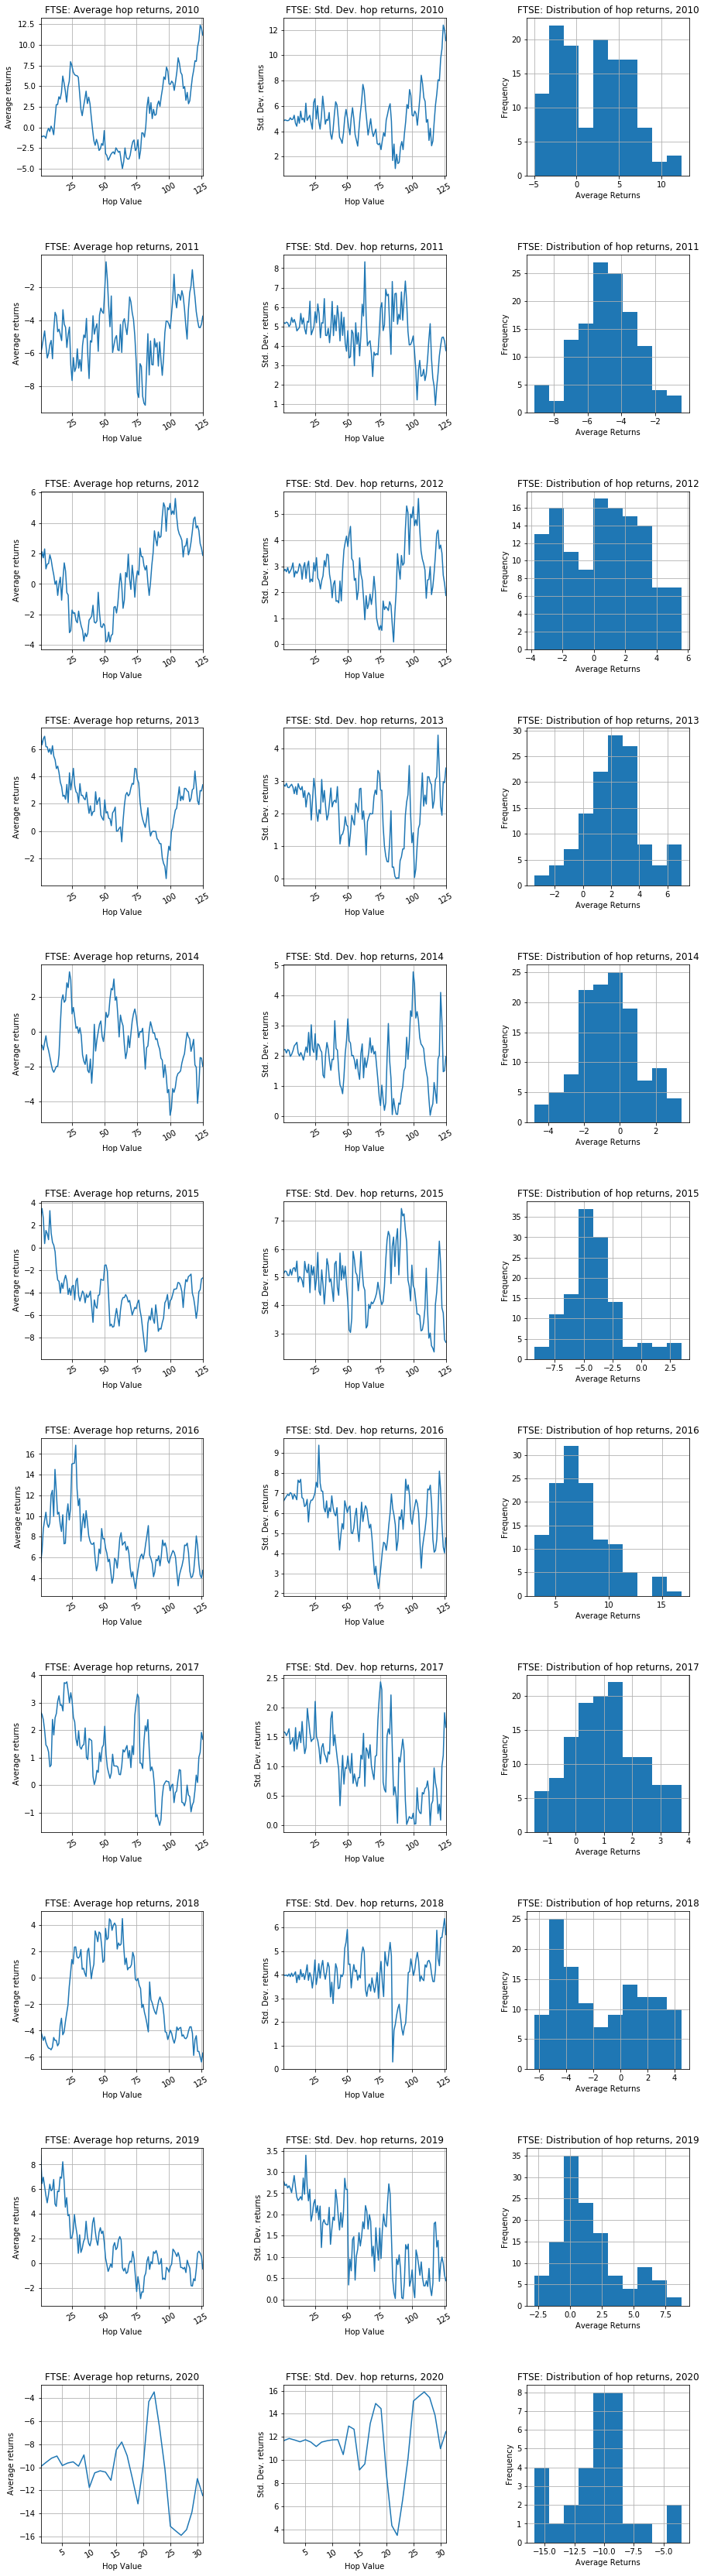

In [201]:
index_cycles('^FTSE', data)

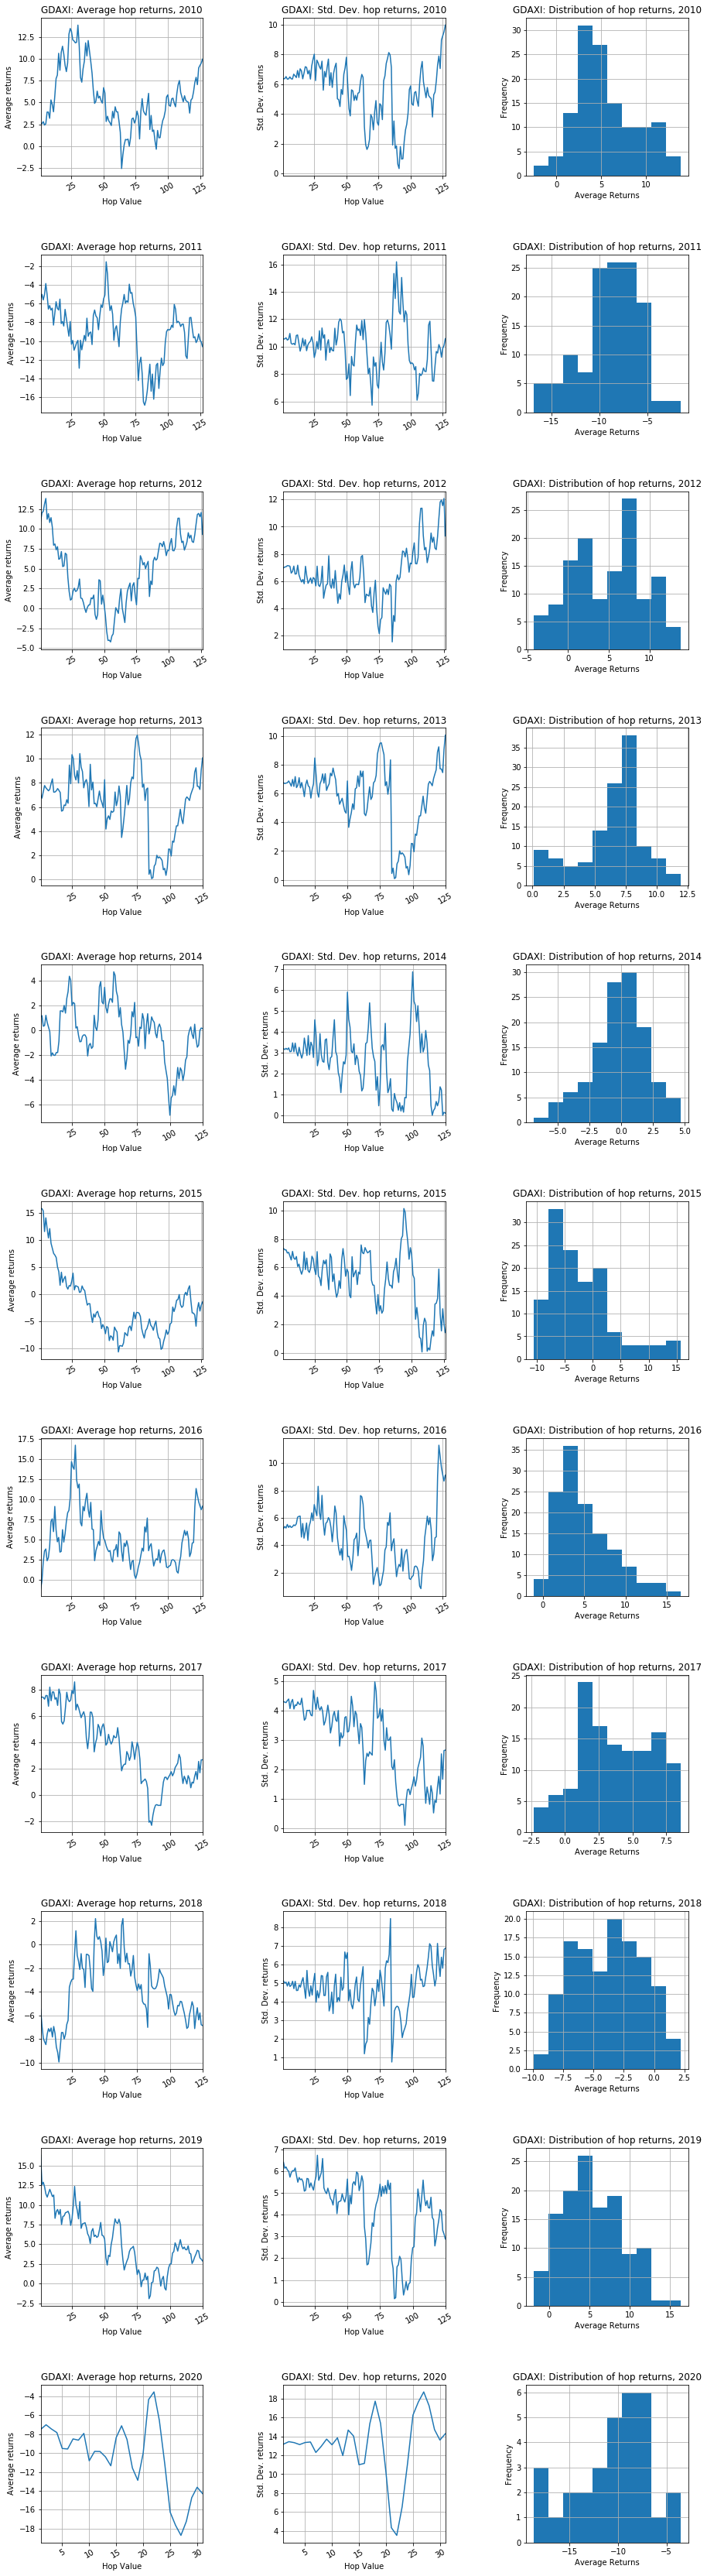

In [202]:
index_cycles('^GDAXI', data)

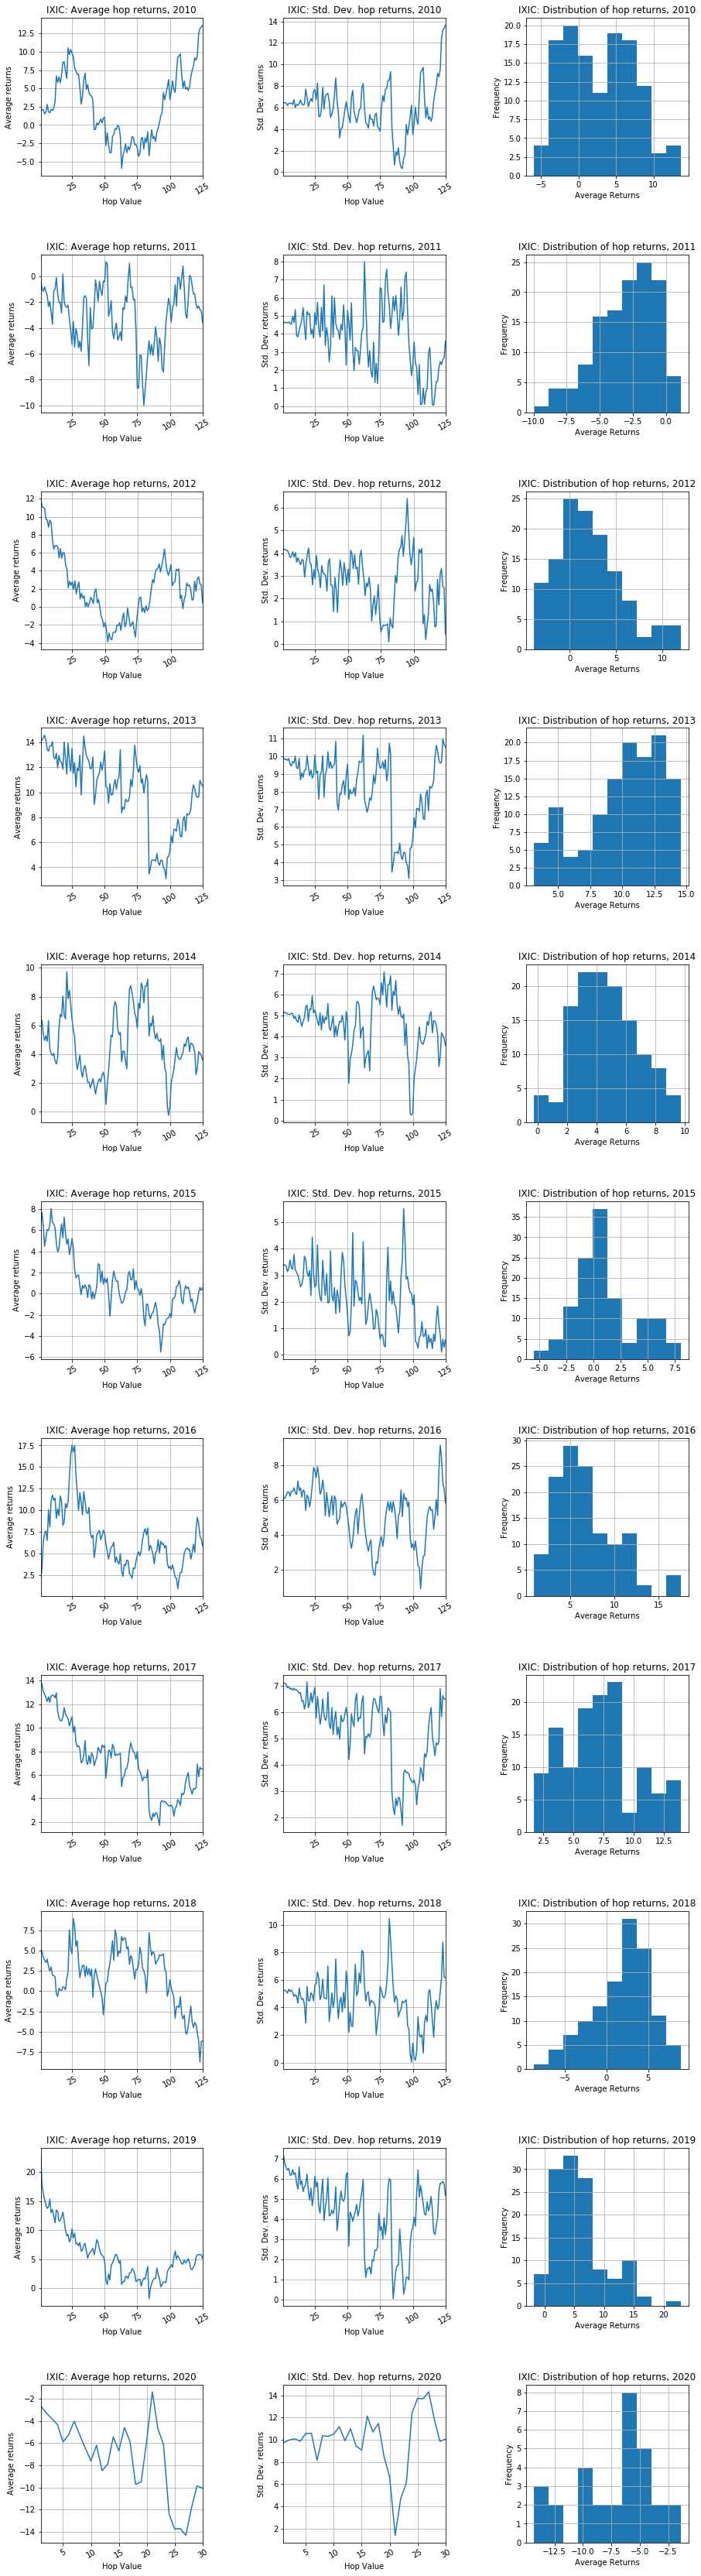

In [203]:
index_cycles('^IXIC', data)

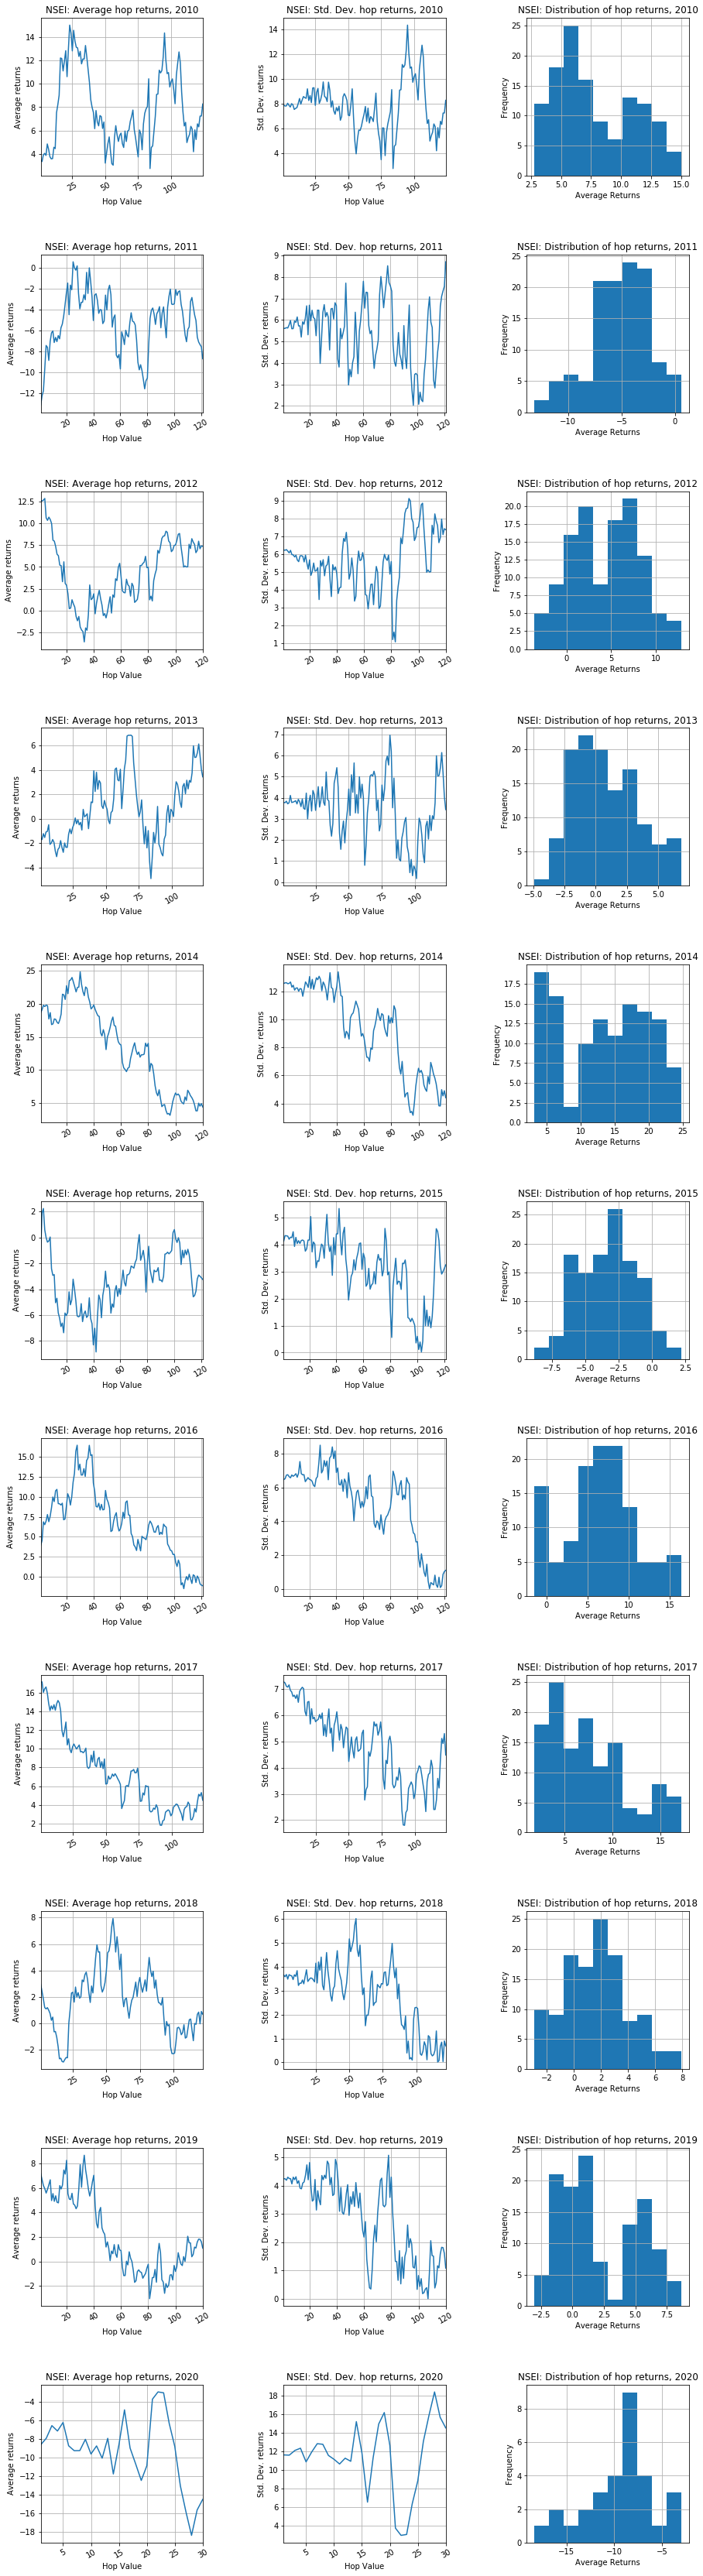

In [204]:
index_cycles('^NSEI', data)